# Problem 166

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Generate Signal Polynomial

          10             9             8             7             6
3.74e-06 x  - 5.763e-06 x - 7.535e-06 x + 7.423e-06 x + 3.543e-06 x
              5             4             3             2
 + 1.402e-05 x + 3.961e-06 x + 1.114e-05 x + 1.991e-05 x - 8.588e-06 x + 1.876e-06


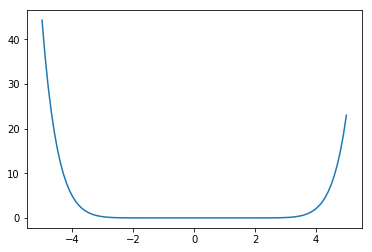

In [2]:
signal = np.poly1d(np.random.normal(scale=.00001,size=(11)))
print(signal)
x = np.linspace(-5,5,100)
plt.plot(x,signal(x))

## Noise

161869544.5909868


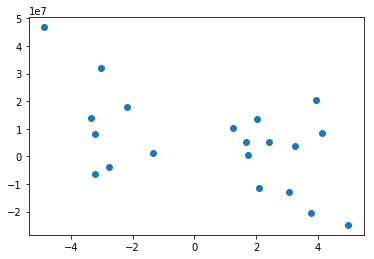

In [3]:
dynamic_range = abs(  max(signal(x))/min(signal(x))  )
print(dynamic_range)
sigma = dynamic_range/10

N = 20
data = np.random.random(size=N)*10 - 5
y = signal(data) + np.random.normal(scale=sigma,size=N)
plt.scatter(data,y)

## Part B: Fit polynomials, and $\chi^2$ decreases for larger k

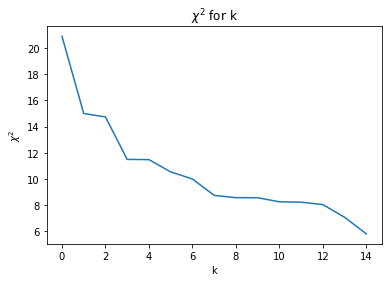

In [4]:
chis = []
for k in range(15):
    poly = np.poly1d(np.polyfit(data,y,k))
    #poly = np.poly1d(np.polyfit)
    #plt.plot(x,poly(x),label=str(k))
    chisq = 1/sigma**2 * np.sum((poly(data)-y)**2)
    chis.append(chisq)

plt.plot(range(15),chis)
plt.title("$\chi^2$ for k")
plt.xlabel("k")
plt.ylabel("$\chi^2$")
#plt.plot(data,y)
#plt.legend(loc="center")
#plt.show()

## Part C.

In [15]:
def fit(N=20):
    signal = np.poly1d(np.random.normal(scale=.000001,size=(11)))
    #print(signal)
    x = np.linspace(-5,5,100)
    #plt.plot(x,signal(x))
    #print(max(signal(x)),min(signal(x)))
    dynamic_range = abs(  max(signal(x)) - min(signal(x))  )
    #print(dynamic_range)
    sigma = signal(x).var()/10
    #sigma = dynamic_range/10

    data = np.random.random(size=N)*10 - 5
    y = signal(data) + np.random.normal(scale=sigma,size=N)
    #plt.scatter(data,y)

    chis = []
    for k in range(25):
        poly = np.poly1d(np.polyfit(data,y,k))
        #poly = np.poly1d(np.polyfit)
        #plt.plot(x,poly(x),label=str(k))
        chisq = 1/sigma**2 * np.sum((poly(data)-y)**2)
        chis.append(chisq)

    chi = np.array(chis)
    min_e = chi**2/N
    return chi
    #print(min_e)

    #return(min_e)

    

<function matplotlib.pyplot.show(*args, **kw)>

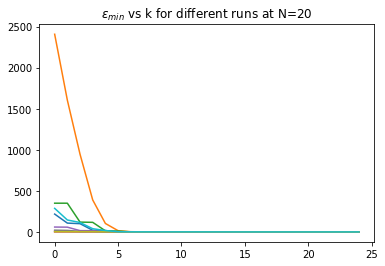

In [35]:
for x in range(10):
    plt.plot(range(25),fit(20)/20)
#plt.yscale("log")
#plt.plot(range(15),min_e)
plt.title("$\epsilon_{min}$ vs k for different runs at N=20")
plt.show

## The minimum energy at a given k varies a lot (by several orders of magnitude) for low k, but converges for higher k.  The varaince seems to increase at larger N, but $\epsilon_{min}$ still converges around k=6.

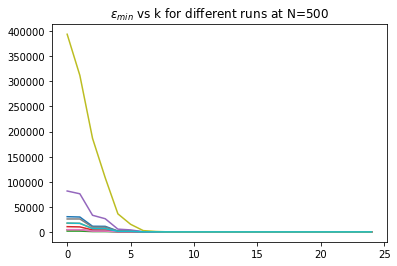

In [36]:
for x in range(10):
    plt.plot(range(25),fit(500))
#plt.yscale("log")
#plt.plot(range(15),min_e)
plt.title("$\epsilon_{min}$ vs k for different runs at N=500")
plt.show()

## Part D: Relavant terms to minimize are 1/2 $\chi^2$ and K/2 $log$ N

In [22]:
def makeplot(max_samples):
    import warnings
    warnings.filterwarnings("ignore")

    xrange = np.logspace(0,np.log10(max_samples),num=40)
    #print(xrange)
    for n in xrange:
        #print(n)
        best_k = []
        n=int(np.floor(n))
        for x in range(50):
            best_k.append( [n,np.argmin(1/2*fit(n) +np.arange(25)/2*np.log(n))] )

        best_k = np.array(best_k)
        plt.errorbar(n,best_k[:,1].mean(), yerr=best_k[:,1].std(),ecolor="deepskyblue")
        plt.scatter(n,best_k[:,1].mean(),label="N="+str(n),c=0,marker=".")
    #plt.legend(loc="best")
    #plt.xticks(range(1,max_samples))
    plt.xscale("log")
    plt.xlabel("Number of samples")
    plt.ylabel("Optimal Polynomial Order")
    plt.show()

## Now we can reproduce Fig 6.41.  This is for a 10th degree "signal" polynomial.  For only a few samples, the optimal $K$ is less than 10, but it approaches 10 for large N

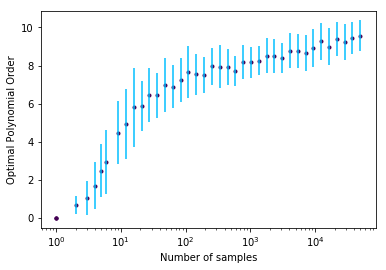

In [26]:
makeplot(50000)